# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# Proyecto 5

Una tienda de videojuegos de nivel global almancena la información de diferentes videojuegos, datos como lo son las calificaciones de la crítica, el género, el título, la plataforma y el año de lanzamiento y las ventas que tuvieron en diferentes regiones.

Se realizará un análisis para comprobar si existen patrones que nos ayuden a determinar el éxito de un videojuego comprobando la región en la que salió, el género del mismo y como afectan las reseñas tanto de usuarios como de criticos en las ventas de dicho videojuego.

Igualmente se realiza la validación de las siguientes hipótesis:

    — Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
    — Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>


## Preparación de datos

Se realiza la preparación correspondiente de datos para poder trabajar con ellos posteriormente

Importación de librerías necesarias para trabajar 

In [39]:
#Se importan las librerias necesarias para poder trabajar con el dataframe 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import re

Importación de dataframe correspondiente

In [2]:
#Se importa el dataframe correspondiente
#Se tuvo un inconveniente con la ruta "/datasets/games.csv" ya que de un día para otro no leía esa ruta, se solicitó apoyo
#y solicitaron continuar con la ruta completa del archivo
df_games = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

Primera visualización general del dataframe

In [3]:
#Se realiza una primera visualización de los datos
print(df_games.head())



                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


<div class="alert alert-block alert-success">
<b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Quiero darte un consejo útil: en lugar de usar la función `print` para mostrar tus DataFrames en Jupyter Notebook, simplemente escribe el nombre del DataFrame en una celda.

En otras palabras, en lugar de hacer esto:

```python
print(mi_dataframe)
```

Puedes hacer esto en una celda por separado:

```python
mi_dataframe
```

Cuando lo haces de esta manera, Jupyter Notebook interpreta y muestra tus DataFrames de una manera más agradable, haciéndolos más fáciles de leer. No es necesario usar `print` en este caso.

Espero que esta sugerencia te ayude a trabajar de manera más eficiente en tus proyectos. ¡Sigue adelante y sigue aprendiendo!
</div>


Se realiza el cambio de mayúsculas a minúsculas, así como la validación de los tipos de datos

In [4]:
#Se realiza el cambio de columnas de mayúsculas a minúsculas 
df_games.columns = df_games.columns.str.lower()

In [5]:
#Se validan los tipos de datos para cada una de las columnas
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto, info(), head()  son herramientas esceneciales que nos ayudaran a hacer un análisis exploratorio inicial. Opcionalmente podrías siempre incluir describe() para tener mejor idea de los valores que toman tus varibales. Continúa con el buen trabajo! </div>

In [6]:
#Se validan datos duplicados
print(df_games.duplicated().sum())

0


Se validan valores ausentes en name y genre, se valida que ambos datos coinciden para las mismas columnas, se eliminan datos ya que no aportan nada en el análisis

In [7]:
print(df_games[df_games['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [8]:
# Eliminar filas con valores nulos solo en las columnas 'name' y 'genre'
df_games = df_games.dropna(subset=['name', 'genre'])

Para rellenar los valores ausentes se puede utilizar la mediana realizando una busqueda por juego y por año de lanzamiento, esto nos ayudará a localizar algun juego que haya sido lanzado en el mismo año pero en el dataframe aparece como valor nulo

In [9]:
games_year = df_games.groupby('name')['year_of_release'].median()

df_games['year_of_release'] = df_games.set_index('name')['year_of_release'].fillna(games_year).reset_index(drop=True)

Se extrae el año del texto del juego, ya que algunos titulos, por ejemplo deportivos, tienen el año dentro del título, esto nos ayudará a reducir la cantidad de datos nulos

In [10]:
# Se define una función para extraer el año del nombre del juego
def extract_year(name):
    if isinstance(name, str):
        words = name.split()  # Dividir el título en palabras
        for word in reversed(words):  # Iterar sobre las palabras en orden inverso
            match = re.search(r'\b\d{4}\b', word)  # Buscar un patrón de cuatro dígitos
            if match:
                return int(match.group())
    return float('nan')

# Crear la variable 'year_title' con los años extraídos
year_title = df_games['name'].apply(extract_year)

df_games['year_of_release'] = df_games['year_of_release'].fillna(year_title)

Se cambia el tipo de dato a Datetime y se convierte a entero para obtener unicamente el año

In [11]:
#Se cambia al tipo de dato DateTime

df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y', errors='coerce').dt.year.astype('Int64')



Se realiza el llenado de valores ausentes dentro de las columas de critic_score y user_score, tomando la media de cada uno de los videojuegos de acuerdo a la plataforma 

In [12]:
games_critic_score = df_games.groupby('platform')['critic_score'].median()

df_games['critic_score'] = df_games.set_index('platform')['critic_score'].fillna(games_critic_score).reset_index(drop=True)



In [13]:
df_games['user_score'] = df_games['user_score'].replace('tbd', None).astype(float)

games_user_score = df_games.groupby('platform')['user_score'].mean()

df_games['user_score'] = df_games.set_index('platform')['user_score'].fillna(games_user_score).reset_index(drop=True)


In [14]:
print(df_games.isna().sum())

null_games = df_games[df_games['critic_score'].isna()]


name                  0
platform              0
year_of_release     136
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1120
user_score         1120
rating             6764
dtype: int64


Se realiza el llenado de los valores ausentes dentro de la columa rating, se utiliza la abreviación 'NR-P' ya que es la abreviación correspondiente para videojuegos que aun no cuentan con alguna reseña o se encuentran pendientes

In [15]:
df_games['rating'].fillna('NR-P', inplace=True)

print(df_games['rating'].unique())

['E' 'NR-P' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Se añade la columna de ventas totales

In [16]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

print(df_games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2003        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             <NA>      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Gran trabajo con la sección de pre-procesamiento de datos. Has enriquecido tus datos y los has imputado de forma adecuada utilizando la media. Te aconsejaría solo mejorar el aspecto de la interpretacio4n de los dataframes al usar print() </div>

## Analisis de datos

Se realizará el análisis adecuado de la información para determinar las plataformas con mayor venta de videojuegos y apartir de ello validar que puede o no afectar la venta de los videojuegos

Validación de juegos lanzados por año

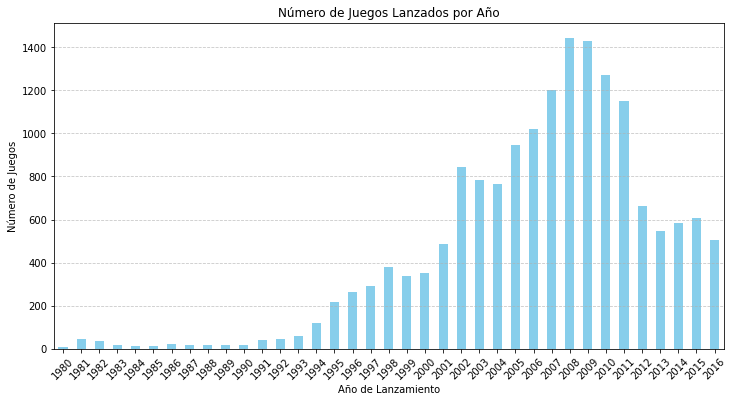

In [17]:
# Agrupar por año y contar el número de juegos lanzados por año
games_per_year = df_games.groupby('year_of_release').size()

# Crear el gráfico de barras para visualizar la diferencia por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

Se puede apreciar que durante el periodo de 2001 a 2011 fue cuando se lanzaron más juegos, a diferencia del periodo de 1980 a 1993 donde la cantidad de juegos lanzados por cada año fue relativamente poca y posteriormente en un periodo de 2012 a 2016 los la cantidad de juegos también disminuyó 

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

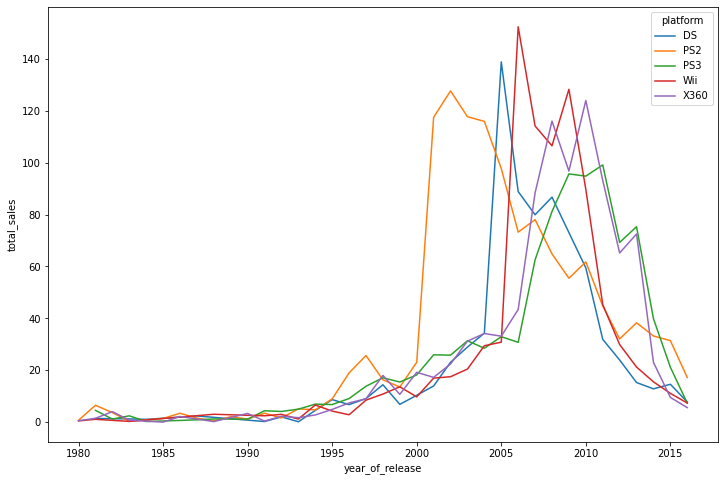

In [18]:
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5).index

df_year_games = df_games[df_games['platform'].isin(top_platforms)]

platform_year_sales = df_year_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data = platform_year_sales, x = 'year_of_release', y='total_sales', hue='platform')

Se puede validar de acuerdo a la gráfica anterior que se cuentan con valores atípicos para la consola de DS.
Igualmente podemos apreciar que las consolas tardan aproximadamente 5 años en inicar y finalizar su ciclo.

Para poder construir un modelo para el año 2017 podemos utilizar un periodo de 5 años.

Se puede validar que las plataformas líderes en venta son PS2, Wii y X360, los cuales pueden ser potencialmente rentables ya que su periodo de venta alcanza los 10 años aproximadamente

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

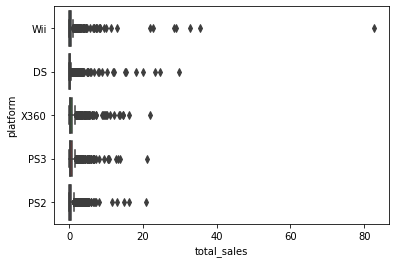

In [19]:
sns.boxplot(data = df_year_games, x ='total_sales', y='platform')

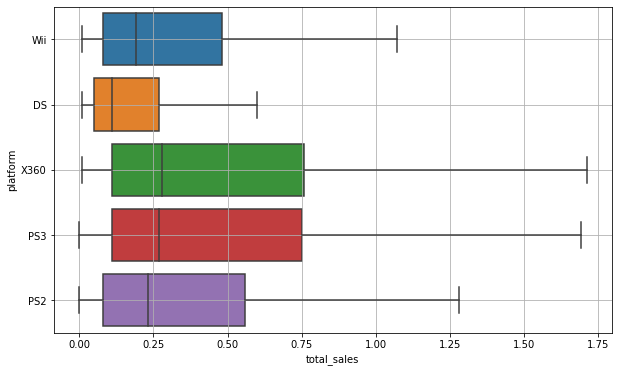

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_year_games, x ='total_sales', y='platform', showfliers = False)
plt.grid(True)



Al analizar las ventas totales se puede validar que las ventas por plataformas como son X360, PS3 y PS2 tienen muy poca diferencia en la mediana a diferencia de Wii y DS, siendo DS la plataforma la mediana más baja de las 5 plataformas
Igualmente se puede validar que Wii cuenta con datos atípicos

In [21]:
df_xbox = df_year_games[df_year_games['platform'] == 'X360']

print(df_xbox)

                                  name platform  year_of_release     genre  \
14                  Kinect Adventures!     X360             2010      Misc   
23                  Grand Theft Auto V     X360             2013    Action   
29      Call of Duty: Modern Warfare 3     X360             2011   Shooter   
32             Call of Duty: Black Ops     X360             2010   Shooter   
35          Call of Duty: Black Ops II     X360             2012   Shooter   
...                                ...      ...              ...       ...   
16613         Dragon Ball Z for Kinect     X360             2012  Fighting   
16622  World Snooker Championship 2007     X360             2000    Sports   
16647      Metal Gear Solid HD Edition     X360             2011    Action   
16654               Ben 10 Omniverse 2     X360             2007    Action   
16711                 LMA Manager 2007     X360             2003    Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

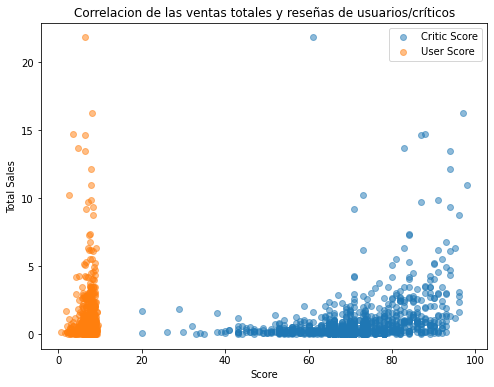

Correlación entre reseñas de críticos y ventas totales: 0.3496004076425395
Correlación entre reseñas de usuarios y ventas totales: 0.026966370726694742


In [22]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_xbox['critic_score'], df_xbox['total_sales'], label='Critic Score', alpha=0.5)
plt.scatter(df_xbox['user_score'], df_xbox['total_sales'], label='User Score', alpha=0.5)

# Añadir etiquetas y título
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.title('Correlacion de las ventas totales y reseñas de usuarios/críticos')
plt.legend()

# Mostrar el gráfico
plt.show()

# Calcular correlación
correlation_critic = df_xbox['critic_score'].corr(df_xbox['total_sales'])
correlation_user = df_xbox['user_score'].corr(df_xbox['total_sales'])

print("Correlación entre reseñas de críticos y ventas totales:", correlation_critic)
print("Correlación entre reseñas de usuarios y ventas totales:", correlation_user)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
El uso de diagramas de dispersión para visualizar las ventas globales por plataforma y el cálculo de correlaciones demuestra un análisis meticuloso. **Has calculado la correlación como se solicitó en el brief del proyecto**, proporcionando una comprensión clara de la relación entre puntuaciones y ventas.
</div>


Se puede validar que la correlacion de las reseñas con la venta de videojuegos no es tan fuerte tomando en cuenta las reseñas de los usuarios con ello podemos sugerir que las reseñas de los usuarios no tienen impacto alguno en la venta de videojuegos, a diferencia de correlacion entre las reseñas de los críticos, la cuál no es una correlación fuerte (0.36) pero con ello se puede sugerir que si un juego recibe mejor calificación por parte de la crítica tienden a tener mejores ventas totales.

In [23]:
#Se filtra el dataframe que tiene las plataformas top para localizar los juegos de xbox que son multiplataforma 
df_xbox_multiplatform = df_year_games[df_year_games['name'].isin(df_xbox['name'])]

# Se excluye la plataforma de Xbox 360 para que solo queden las demás plataformas
df_xbox_multiplatform = df_xbox_multiplatform[df_xbox_multiplatform['platform'] != 'X360']

print(df_xbox_multiplatform)


                                                   name platform  \
16                                   Grand Theft Auto V      PS3   
17                        Grand Theft Auto: San Andreas      PS2   
34                           Call of Duty: Black Ops II      PS3   
37                       Call of Duty: Modern Warfare 3      PS3   
41                              Call of Duty: Black Ops      PS3   
...                                                 ...      ...   
16065                                      Dream C Club      PS3   
16067                  SBK Superbike World Championship      PS2   
16230                                     Madden NFL 13      PS3   
16312                 Monster High: New Ghoul in School      Wii   
16709  SCORE International Baja 1000: The Official Game      PS2   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
16                2013      Action      7.02      9.09      0.98         3.96   
17                200

Se genera el gráfico de dispersión de los juegos que estuvieron en X360 y en otras plataformas

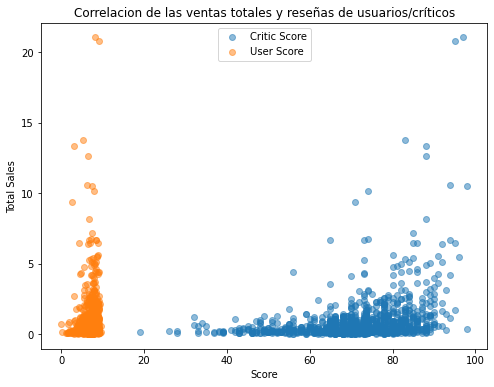

Correlación entre reseñas de críticos y ventas totales: 0.32919566869558314
Correlación entre reseñas de usuarios y ventas totales: 0.045483907703030346


In [24]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_xbox_multiplatform['critic_score'], df_xbox_multiplatform['total_sales'], label='Critic Score', alpha=0.5)
plt.scatter(df_xbox_multiplatform['user_score'], df_xbox_multiplatform['total_sales'], label='User Score', alpha=0.5)

# Añadir etiquetas y título
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.title('Correlacion de las ventas totales y reseñas de usuarios/críticos')
plt.legend()

# Mostrar el gráfico
plt.show()

# Calcular correlación
correlation_critic = df_xbox_multiplatform['critic_score'].corr(df_xbox_multiplatform['total_sales'])
correlation_user = df_xbox_multiplatform['user_score'].corr(df_xbox_multiplatform['total_sales'])

print("Correlación entre reseñas de críticos y ventas totales:", correlation_critic)
print("Correlación entre reseñas de usuarios y ventas totales:", correlation_user)

Se puede validar que no hay mucha diferencia entre los juegos lanzados en Xbox y esos mismos juegos lanzados en otras plataformas, la correlacion se mantiene de 0.36 entre las ventas y las reseñas de críticos y en un 0.11 entre ventas totales y reseñas de usuarios.

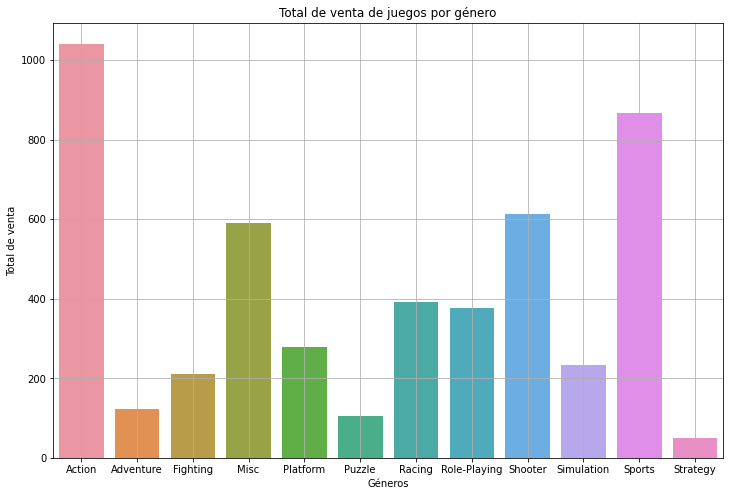

In [25]:
df_platforms = df_year_games.groupby(['genre'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data = df_platforms, x = 'genre', y='total_sales')

# Añadir etiquetas y título
plt.xlabel('Géneros')
plt.ylabel('Total de venta')
plt.title('Total de venta de juegos por género')

plt.grid(True)

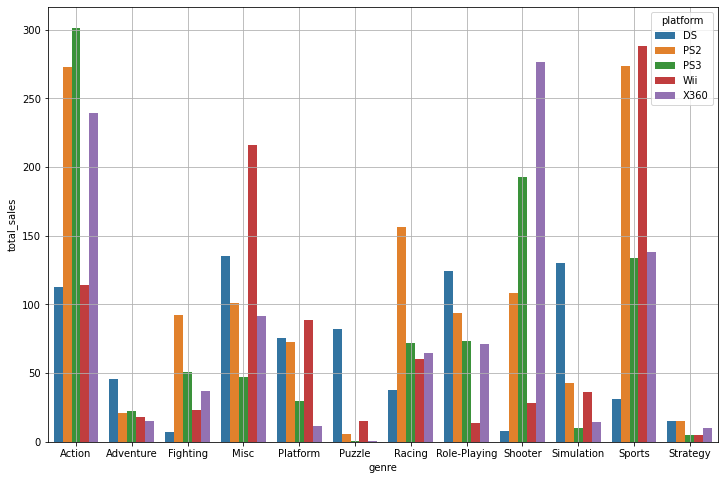

In [26]:
df_genre_platform = df_year_games.groupby(['platform', 'genre'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data = df_genre_platform, x = 'genre', y='total_sales', hue='platform')
plt.grid(True)

Se puede apreciar que los géneros que cuentan con mayores ventas son action, sports, shooter y misc, los cuales se pueden considerar como los géneros más rentables.
Visualizando las ventas por genero dependiendo de la plataforma nos percatamos que dependiendo la consola también depende el genero de juegos que adquieren los compradores, por ejemplo usuarios de la plataforma PS2 suelen adquirir más juegos de acción y deporte, usuarios de PS3 y X360 adquieren más juegos de shooter y acción, sin embargo los usuarios de Wii tienden a adquirir juegos mas relacionados a deporte o MISC.

## Creación de perfiles para cada una de las regiones



In [27]:
df_year_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8225 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8225 non-null   object 
 1   platform         8225 non-null   object 
 2   year_of_release  8167 non-null   Int64  
 3   genre            8225 non-null   object 
 4   na_sales         8225 non-null   float64
 5   eu_sales         8225 non-null   float64
 6   jp_sales         8225 non-null   float64
 7   other_sales      8225 non-null   float64
 8   critic_score     7814 non-null   float64
 9   user_score       7814 non-null   float64
 10  rating           8225 non-null   object 
 11  total_sales      8225 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.1+ MB


In [28]:
# Agrupar por plataforma y sumar las ventas por región
regions = df_games.groupby('platform')[['na_sales', 'jp_sales', 'eu_sales']].sum().reset_index()

# Convertir las ventas por región en un formato largo (long format)
df_regions = pd.melt(regions, id_vars=['platform'], var_name='region', value_name='sales')

# Seleccionar las 5 plataformas con mayores ventas para cada región
top_platforms_by_region = df_regions.groupby('region').apply(lambda x: x.nlargest(5, 'sales')).reset_index(drop=True)

# Mostrar el DataFrame con las 5 plataformas con más ventas por región
print(top_platforms_by_region)


   platform    region   sales
0       PS2  eu_sales  339.29
1       PS3  eu_sales  330.29
2      X360  eu_sales  270.76
3       Wii  eu_sales  262.21
4        PS  eu_sales  213.61
5        DS  jp_sales  175.57
6        PS  jp_sales  139.82
7       PS2  jp_sales  139.20
8      SNES  jp_sales  116.55
9       3DS  jp_sales  100.67
10     X360  na_sales  602.47
11      PS2  na_sales  583.84
12      Wii  na_sales  496.90
13      PS3  na_sales  393.49
14       DS  na_sales  382.40


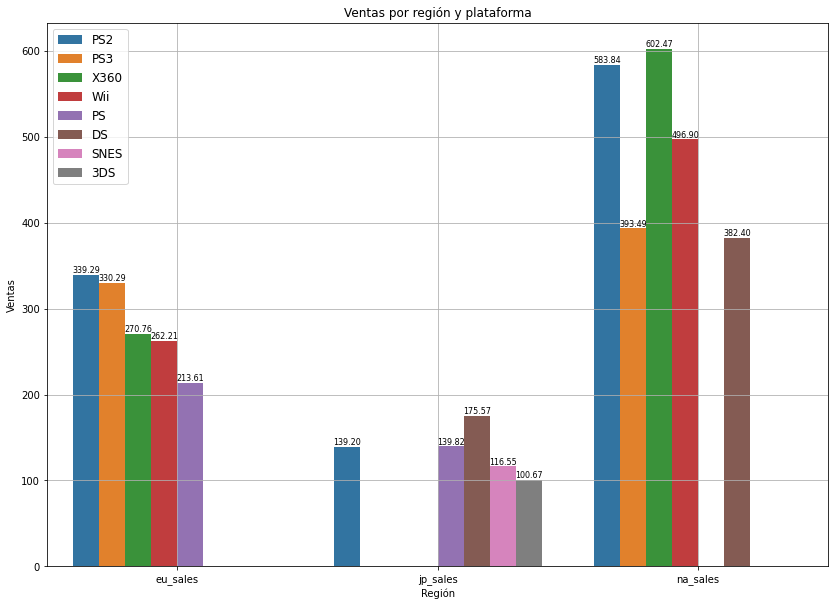

In [29]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_platforms_by_region, x='region', y='sales', hue='platform', ci=None)
ax.set_title('Ventas por región y plataforma')
ax.set_xlabel('Región')
ax.set_ylabel('Ventas')

for p in ax.patches:
    if np.isfinite(p.get_height()):
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom', fontsize=8)

plt.legend(fontsize='large')
plt.grid(True)
plt.show()




Se realiza un filtrado del dataframe para solo quedarnos con las 5 plataformas principales por region y se realiza una graficación con los datos obtenidos para facilitar su análisis.
Dentro de esta información mostrada apreciamos que la diferencia es significativa entre la región de japón y las otras dos siendo la plataforma lider DS.
Dentro de la región de EU se aprecia que la plataforma lider es PS2 y en la región de NA la plataforma lider es X360, aunque igualmente existe una diferencia grande de ventas entre las 3 regiones.

In [30]:
genre_regions = df_games.groupby('genre')[['na_sales', 'jp_sales', 'eu_sales']].sum().reset_index()

# Convertir las ventas por región en un formato largo (long format)
df_genre = pd.melt(genre_regions, id_vars=['genre'], var_name='region', value_name='sales')

# Seleccionar las 5 plataformas con mayores ventas para cada región
top_genre_by_region = df_genre.groupby('region').apply(lambda x: x.nlargest(5, 'sales')).reset_index(drop=True)

# Mostrar el DataFrame con los 5 géneros con más ventas por región
print(top_genre_by_region)

           genre    region   sales
0         Action  eu_sales  519.13
1         Sports  eu_sales  376.79
2        Shooter  eu_sales  317.34
3         Racing  eu_sales  236.51
4           Misc  eu_sales  212.74
5   Role-Playing  jp_sales  355.41
6         Action  jp_sales  161.43
7         Sports  jp_sales  135.54
8       Platform  jp_sales  130.83
9           Misc  jp_sales  108.11
10        Action  na_sales  879.01
11        Sports  na_sales  684.43
12       Shooter  na_sales  592.24
13      Platform  na_sales  445.50
14          Misc  na_sales  407.27


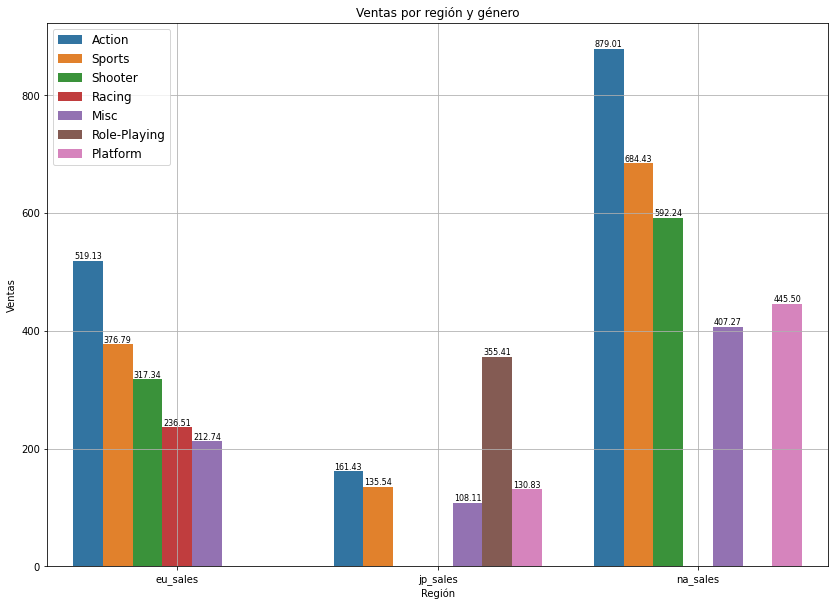

In [31]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_genre_by_region, x='region', y='sales', hue='genre', ci=None)
ax.set_title('Ventas por región y género')
ax.set_xlabel('Región')
ax.set_ylabel('Ventas')

for p in ax.patches:
    if np.isfinite(p.get_height()):
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom', fontsize=8)

plt.legend(fontsize='large')
plt.grid(True)
plt.show()

Se realiza un filtrado de datos para poder encontrar los 5 géneros con más ventas por región, posteriormente se grafica dicha información para poder analizar visualmente el comportamiento de la información.
Se puede percatar que en el NA como en EU tienen 3 géneros con mayores ventas en común como lo son acción, deportes y shooter, mientras que en JP predomina el género de Role-Playing, el cual no se encuentra dentro del top 5 de las otras dos regiones.
Igualmente la región de EU es la única que tiene dentro de su top de ventas el género de carreras.


In [32]:
rating_regions = df_games.groupby('rating')[['na_sales', 'jp_sales', 'eu_sales']].sum().reset_index()

# Convertir las ventas por región en un formato largo (long format)
df_ratings = pd.melt(rating_regions, id_vars=['rating'], var_name='region', value_name='sales')

# Seleccionar las 5 plataformas con mayores ventas para cada región
top_rating_by_region = df_ratings.groupby('region').apply(lambda x: x.nlargest(5, 'sales')).reset_index(drop=True)

# Mostrar el DataFrame con los 5 géneros con más ventas por región
print(top_rating_by_region)

   rating    region    sales
0       E  eu_sales   710.25
1    NR-P  eu_sales   613.30
2       M  eu_sales   483.97
3       T  eu_sales   427.03
4    E10+  eu_sales   188.52
5    NR-P  jp_sales   841.93
6       E  jp_sales   198.11
7       T  jp_sales   151.40
8       M  jp_sales    64.24
9    E10+  jp_sales    40.20
10      E  na_sales  1292.99
11   NR-P  na_sales  1240.68
12      T  na_sales   759.75
13      M  na_sales   748.48
14   E10+  na_sales   353.32


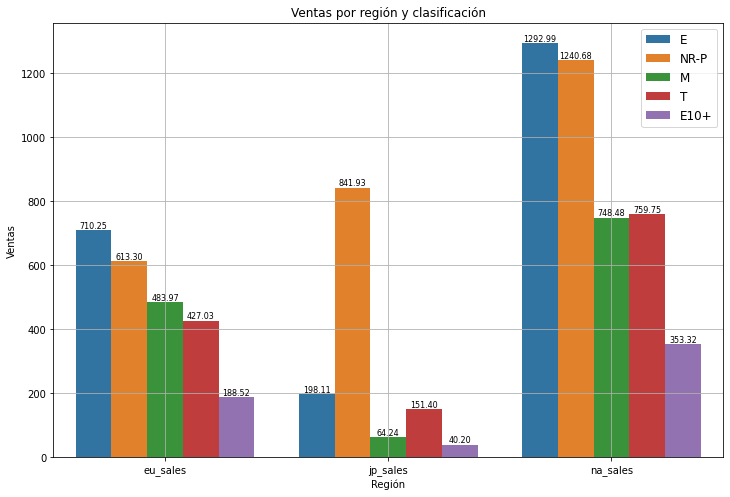

In [33]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_rating_by_region, x='region', y='sales', hue='rating', ci=None)
ax.set_title('Ventas por región y clasificación')
ax.set_xlabel('Región')
ax.set_ylabel('Ventas')

for p in ax.patches:
    if np.isfinite(p.get_height()):
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom', fontsize=8)

plt.legend(fontsize='large')
plt.grid(True)
plt.show()

Se realiza el filtrado del dataframe para obtener las 5 clasificaciones de ESRB de acuerdo a la región posteriormente se muestra una gráfica para representar los datos de manera visual.
Se puede percatar que la mayor parte de videojuegos son categoría NR-P lo cuál significa que no cuentan aun con clasificación alguna dentro de las 3 regiones, sin embargo las 3 regiones cuentan con las mismas clasificaciones con excepción de las NR-P, tales como E, M, T y E10+

Visualizando la información se puede considerar que la región de NA es quien consume más videojuegos con clasificación para todos (E) teniendo como género preferido los videojuegos de acción para plataformas como PS2 y X360.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Felitaciones por el manejo de los gráficos. Tienes un excelente uso de busnas prácticas con el uso de ejes adecuados. Adema2s en los diagramas de barras agregas etiquetas para señalar los valores y una sección con los labels adecuados
</div>


## Prueba de hipotesis

Se realizará una prueba para comprobar si de descarta o no las siguientes hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Se utilizará un valor alfa de 0.5  

### Primera hipotesis

H0: La media de las calificaciones de los usuarios para la plataforma Xbox One es igual a la media de las calificaciones de los usuarios para la plataforma PC.

H1: La media de las calificaciones de los usuarios para la plataforma Xbox One es diferente de la media de las calificaciones de los usuarios para la plataforma PC.

In [38]:
xone_info = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()

pc_info = df_games[df_games['platform'] == 'PC']['user_score'].dropna()


Se separan los datos para obtener la información de Xbox One y de PC, se eliminan los datos ausentes para no afectar en la precisión de los resultados de las pruebas.

Se utilizará la prueba ttest_ind puesto que se desconoce la desviación estandar de la población.

In [46]:
alpha = 0.5 

# Realizar la prueba t de muestras independientes
t_statistic, p_value = ttest_ind(xone_info, pc_info)

print(f"""
Clasificación promedio de usuarios para Xbox One es: {xone_info.mean()}
Clasificación promedio de usuarios para PC es: {pc_info.mean()}
""")

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print("")

if p_value < alpha:
    print('Rechazamos nuestra hipotesis nula')
else: 
    print('No hay suficiente evidencia para rechazar la hipótesis nula')


Clasificación promedio de usuarios para Xbox One es: 7.031003944789218
Clasificación promedio de usuarios para PC es: 7.02896670234119

Estadístico t: 0.02246302014216085
Valor p: 0.9820824176607326

No rechazamos la hipótesis nula


### Segunda hipotesis

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. 

H1: Las calificaciones promedio de los usuarios para estos dos géneros son diferentes.

In [50]:
alpha = 0.5

# Filtrar las calificaciones de usuarios para el género de Acción
action_scores = df_games[df_games['genre'] == 'Action']['user_score'].dropna()

# Filtrar las calificaciones de usuarios para el género de Deportes
sports_scores = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

print(f"""
Clasificación promedio de usuarios para Xbox One es: {action_scores.mean()}
Clasificación promedio de usuarios para PC es: {sports_scores.mean()}
""")

# Realizar la prueba t de muestras independientes
t_statistic, p_value = ttest_ind(action_scores, sports_scores)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print("")

# Comprobar si el valor p es menor que el valor alfa
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre las calificaciones promedio de usuarios para los géneros de Acción y Deportes.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula: No podemos concluir que las medias sean diferentes para los géneros de Acción y Deportes.")



Clasificación promedio de usuarios para Xbox One es: 7.152413575570604
Clasificación promedio de usuarios para PC es: 7.129859391542143

Estadístico t: 0.6651000277614723
Valor p: 0.5060153422918124

No hay suficiente evidencia para rechazar la hipótesis nula: No podemos concluir que las medias sean diferentes para los géneros de Acción y Deportes.


<div class="alert alert-block alert-warning">
<b>Comentario del Revisor:</b>
<br>
Tu enfoque para realizar las pruebas de hipótesis es sólido, sin embargo, te recomiendo encarecidamente revisar la documentación oficial de <code>scipy.stats.ttest_ind</code> para optimizar tu análisis, especialmente en lo que respecta al manejo de valores NaN en tus datasets. Un aspecto crucial que podrías mejorar es la inclusión del parámetro <code>nan_policy='omit'</code> en tus pruebas de hipótesis. Este parámetro te permite manejar de manera eficiente los valores NaN, omitiéndolos durante el cálculo, lo cual es esencial para no tener que eliminar o imputar manualmente estos valores antes de realizar las pruebas.
<br><br>
Para más información sobre cómo implementar este parámetro y explorar otras funcionalidades útiles, te invito a consultar la documentación oficial de <code>scipy.stats.ttest_ind</code> aquí: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html">Scipy Documentation</a>. Esto no solo enriquecerá tu comprensión del método sino que también te proporcionará herramientas para realizar análisis estadísticos más robustos y precisos.
</div>


## Conclusión

Desde 1994, se ha observado un notable aumento en las ventas de videojuegos, especialmente a partir del año 2002. Este crecimiento ha sido una tendencia constante en la industria, marcando un período de expansión significativa que ha llevado a un aumento sostenido en el interés y la participación en el mercado de los videojuegos.

Al considerar el ciclo de vida de una plataforma, se estima que su período de ventas activas se extiende aproximadamente durante cinco años desde su lanzamiento inicial. Durante este lapso, los juegos suelen experimentar un flujo constante de ventas antes de alcanzar un declive gradual en su popularidad y demanda.

Si bien las reseñas de los críticos y los usuarios son elementos importantes en la percepción general de un videojuego, no se ha encontrado una correlación fuerte entre estas calificaciones y las ventas. Esto sugiere que, aunque las opiniones críticas y de los usuarios pueden influir en la reputación y percepción del juego, no ejercen un impacto significativo en sus ventas.

Por otro lado, se ha observado que los géneros de los videojuegos sí tienen un efecto notable en las ventas. Algunos géneros tienden a disfrutar de una mayor demanda y popularidad que otros, lo que sugiere que las preferencias del consumidor varían según el tipo de experiencia de juego que ofrecen.

Es importante destacar que estas tendencias pueden variar entre diferentes regiones geográficas, como Japón, Estados Unidos y Europa. Los géneros de videojuegos más vendidos en cada región pueden diferir significativamente debido a diferencias culturales, preferencias de los jugadores y otras influencias regionales.

Finalmente las pruebas de hipótesis no proporcionan evidencia concluyente para afirmar que las calificaciones de los usuarios entre Xbox One y PC son iguales, ni que difieren entre los géneros de Acción y Deportes.

<div class="alert alert-block alert-success">
<b>Comentario del Revisor:</b><br>
Tus conclusiones generales resumen adecuadamente los hallazgos del análisis. Para los proyectos futuros, considera incluir recomendaciones específicas basadas en tus análisis o sugerir áreas para investigaciones adicionales basadas en las limitaciones de tu estudio actual.</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Impresionante esfuerzo en este proyecto! 🌟 **Este proyecto está listo para ser aprobado.**<br>
Tu habilidad para ejecutar y presentar este trabajo es admirable.<br>
<br>Es un placer reconocer tu dedicación y el análisis detallado que has llevado a cabo. Continúa superándote en tus futuras iniciativas. Confío en que aplicarás este conocimiento de manera efectiva en desafíos futuros, avanzando hacia objetivos aún más ambiciosos.
</div>
